## 1.10 Quiz: Softmax

[Udacity Video](https://classroom.udacity.com/courses/ud730/lessons/6370362152/concepts/63815621490923)

Implement the `softmax` function so that scores of `[1.0, 2.0, 3.0]` produces softmax of `[0.09003057, 0.24472847, 0.66524096]`.

In [1]:
import numpy as np

# Input score

scores = np.array([1.0, 2.0, 3.0])

Softmax is defined as:
$$S(y_i) = \frac{e^{y_i}}{\sum\limits_{j} e^{y_j}}$$

I have no experience with Numpy. A quick search on documentation and code examples shows I can use `np.exp(x)` to calculate e^x for every elements of in vector `x`.

In [2]:
# To calculate e^y
print(np.exp(scores))

# To sum up all of the e^y
print(np.exp(scores).sum())

[  2.71828183   7.3890561   20.08553692]
30.1928748506


In [3]:
# However, we must deal with the cases where we have a 2D array, e.g.,
scores2d = np.array([[1,2,3],
                     [4,5,6],
                     [7,8,9]])

# Sum will add everything up, e.g., 1 + 2 + ... + 8 + 9
print(scores2d.sum());

45


In [4]:
# We must sum up vertically, by setting axis to 0.
# It'll sum up by the columns, so that the resulting vector will have the column sum as each of the elements. 
print(scores2d.sum(axis=0))

# To calculate the sum of e^y
print(np.exp(scores2d).sum(axis=0))

[12 15 18]
[ 1153.94959029  3136.76020224  8526.59825799]


In [5]:
# If you divide a vector by a number, each element in the vector will be divided using the numerator.
print(scores / 2.0)

[ 0.5  1.   1.5]


In [6]:
# If you divide a vector by a vector, each element in the vector will be divided by the corresponding
# element in the numerator.

print(scores / [10, 100, 100])

[ 0.1   0.02  0.03]


In [7]:
# So, to calculate the softmax, according to the equation
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x)
    return e_x / e_x.sum(axis=0)

In [8]:
print(softmax(scores))

[ 0.09003057  0.24472847  0.66524096]


In [9]:
"""
Sum of the softmax should be 1.
In case of a 2D array, the sum of a column should add up to 1.
"""
print(softmax(scores).sum(axis = 0))

1.0


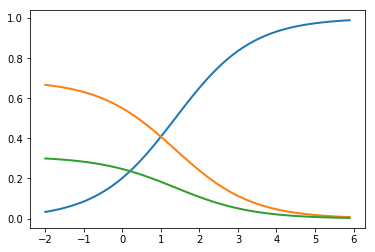

In [10]:
%matplotlib inline

# Plot softmax curves
import matplotlib.pyplot as plt
x = np.arange(-2.0, 6.0, 0.1)
s = np.vstack([x, np.ones_like(x), 0.2 * np.ones_like(x)])

plt.plot(x, softmax(s).T, linewidth=2)
plt.show()

## 1.11 Quiz: Softmax Quiz Part 2

[Udacity Video](https://classroom.udacity.com/courses/ud730/lessons/6370362152/concepts/63741721390923)

What happens when all the scores are multiplied by 10?
- Probabilities get closer to 0.0 and 1.0
- Probabilities get closer to uniform distribution

In [11]:
print(softmax(scores * 10))

[  2.06106005e-09   4.53978686e-05   9.99954600e-01]


## 1.12 Quiz: Softmax Quiz Part 3

[Coursera Video](https://classroom.udacity.com/courses/ud730/lessons/6370362152/concepts/63975713190923)

What happens when all the scores are divided by 10?
- Probabilities get closer to 0.0 and 1.0
- Probabilities get closer to uniform distribution

In [12]:
print(softmax(scores / 10))

[ 0.30060961  0.33222499  0.3671654 ]


## 1.15 Cross Entropy

Cross entrypy is defined as:
$$D(S,L) = -\sum\limits_{i}L_i\log(S_i)$$

In [13]:
def cross_entropy(s, l):
    return -1 * np.sum(l * np.log(s), axis = 0)

In [14]:
print(cross_entropy([0.7, 0.2, 0.1], [1, 0, 0]))

0.356674943939


In [15]:
print(cross_entropy([0.9, 0.1, 0.1], [1, 0, 0]))

0.105360515658


## 1.16 Minimizing Loss Function

[Udacity Video](https://classroom.udacity.com/courses/ud730/lessons/6370362152/concepts/63798118270923)

Loss function is the average cross entropy:

$$\unicode{0321} = \frac{1}{N}\sum\limits_{i}D(S(wx_i+b), L_i)$$

## 1.18 Quiz: Numerical Stability

[Udacity Video](https://classroom.udacity.com/courses/ud730/lessons/6370362152/concepts/71235296110923)

Start with `1,000,000,000`, add `0.000001` 1 million times, then substract `1,000,000,000`, what do you get?

In [16]:
x = 1_000_000_000

for i in range(1_000_000):
    x += 0.000001
    
x -= 1_000_000_000

print(x)

0.95367431640625


## 1.21 Assignment  1: notMNIST
[Udacity Link](https://classroom.udacity.com/courses/ud730/lessons/6370362152/concepts/63703142310923)

[Assignment Notebook](https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/udacity/1_notmnist.ipynb)

First, download and extract the [notMNIST data set](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html).

In [17]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [18]:
url = 'https://commondatastorage.googleapis.com/books1000/'
last_percent_reported = None
data_root = './data' # Change me to store data elsewhere

def download_progress_hook(count, blockSize, totalSize):
  """A hook to report the progress of a download. This is mostly intended for users with
  slow internet connections. Reports every 5% change in download progress.
  """
  global last_percent_reported
  percent = int(count * blockSize * 100 / totalSize)

  if last_percent_reported != percent:
    if percent % 5 == 0:
      sys.stdout.write("%s%%" % percent)
      sys.stdout.flush()
    else:
      sys.stdout.write(".")
      sys.stdout.flush()
      
    last_percent_reported = percent
        
def maybe_download(filename, expected_bytes, force=False):
  """Download a file if not present, and make sure it's the right size."""
  dest_filename = os.path.join(data_root, filename)
  if force or not os.path.exists(dest_filename):
    print('Attempting to download:', filename) 
    filename, _ = urlretrieve(url + filename, dest_filename, reporthook=download_progress_hook)
    print('\nDownload Complete!')
  statinfo = os.stat(dest_filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified', dest_filename)
  else:
    raise Exception(
      'Failed to verify ' + dest_filename + '. Can you get to it with a browser?')
  return dest_filename

train_filename = maybe_download('notMNIST_large.tar.gz', 247336696)
test_filename = maybe_download('notMNIST_small.tar.gz', 8458043)

Found and verified ./data/notMNIST_large.tar.gz
Found and verified ./data/notMNIST_small.tar.gz


In [19]:
num_classes = 10
np.random.seed(133)

def maybe_extract(filename, force=False):
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
  if os.path.isdir(root) and not force:
    # You may override by setting force=True.
    print('%s already present - Skipping extraction of %s.' % (root, filename))
  else:
    print('Extracting data for %s. This may take a while. Please wait.' % root)
    tar = tarfile.open(filename)
    sys.stdout.flush()
    tar.extractall(data_root)
    tar.close()
  data_folders = [
    os.path.join(root, d) for d in sorted(os.listdir(root))
    if os.path.isdir(os.path.join(root, d))]
  if len(data_folders) != num_classes:
    raise Exception(
      'Expected %d folders, one per class. Found %d instead.' % (
        num_classes, len(data_folders)))
  print(data_folders)
  return data_folders
  
train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)

./data/notMNIST_large already present - Skipping extraction of ./data/notMNIST_large.tar.gz.
['./data/notMNIST_large/A', './data/notMNIST_large/B', './data/notMNIST_large/C', './data/notMNIST_large/D', './data/notMNIST_large/E', './data/notMNIST_large/F', './data/notMNIST_large/G', './data/notMNIST_large/H', './data/notMNIST_large/I', './data/notMNIST_large/J']
./data/notMNIST_small already present - Skipping extraction of ./data/notMNIST_small.tar.gz.
['./data/notMNIST_small/A', './data/notMNIST_small/B', './data/notMNIST_small/C', './data/notMNIST_small/D', './data/notMNIST_small/E', './data/notMNIST_small/F', './data/notMNIST_small/G', './data/notMNIST_small/H', './data/notMNIST_small/I', './data/notMNIST_small/J']


### Problem 1

> Let's take a peek at some of the data to make sure it looks sensible. Each exemplar should be an image of a character A through J rendered in a different font. Display a sample of the images that we just downloaded. Hint: you can use the package IPython.display.

A little search showed I can use `IPython.display.Image` class to display the picture in Jupyter.

In [20]:
from IPython.display import Image

imagePath = train_folders[0] + "/em9ya29uLnR0Zg==.png"
print(imagePath)
image = Image(filename=imagePath)

image

./data/notMNIST_large/A/em9ya29uLnR0Zg==.png


> Convert the entire dataset into a 3D array (image index, x, y) of floating point values, normalized to have approximately zero mean and standard deviation ~0.5 to make training easier down the road

Since this takes some time to process, and it was annoying not knowing how much it progressed, I found a nice progress bar library that can draw progress bars. See [tqdm](https://github.com/tqdm/tqdm#ipython-jupyter-integration).

In [21]:
from tqdm import tqdm_notebook

image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in tqdm_notebook(image_files, desc="Folder %s" % folder):
    image_file = os.path.join(folder, image)
    try:
      image_data = (imageio.imread(image_file).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except (IOError, ValueError) as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset
        
def maybe_pickle(data_folders, min_num_images_per_class, force=False):
  dataset_names = []
  t = tqdm_notebook(data_folders);
  for folder in t:
    t.set_description(folder)
    set_filename = folder + '.pickle'
    dataset_names.append(set_filename)
    if os.path.exists(set_filename) and not force:
      # You may override by setting force=True.
      print('%s already present - Skipping pickling.' % set_filename)
    else:
      print('Pickling %s.' % set_filename)
      dataset = load_letter(folder, min_num_images_per_class)
      try:
        with open(set_filename, 'wb') as f:
          pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
      except Exception as e:
        print('Unable to save data to', set_filename, ':', e)
  
  return dataset_names

train_datasets = maybe_pickle(train_folders, 45000)
test_datasets = maybe_pickle(test_folders, 1800)

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

./data/notMNIST_large/A.pickle already present - Skipping pickling.
./data/notMNIST_large/B.pickle already present - Skipping pickling.
./data/notMNIST_large/C.pickle already present - Skipping pickling.
./data/notMNIST_large/D.pickle already present - Skipping pickling.
./data/notMNIST_large/E.pickle already present - Skipping pickling.
./data/notMNIST_large/F.pickle already present - Skipping pickling.
./data/notMNIST_large/G.pickle already present - Skipping pickling.
./data/notMNIST_large/H.pickle already present - Skipping pickling.
./data/notMNIST_large/I.pickle already present - Skipping pickling.
./data/notMNIST_large/J.pickle already present - Skipping pickling.



HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

./data/notMNIST_small/A.pickle already present - Skipping pickling.
./data/notMNIST_small/B.pickle already present - Skipping pickling.
./data/notMNIST_small/C.pickle already present - Skipping pickling.
./data/notMNIST_small/D.pickle already present - Skipping pickling.
./data/notMNIST_small/E.pickle already present - Skipping pickling.
./data/notMNIST_small/F.pickle already present - Skipping pickling.
./data/notMNIST_small/G.pickle already present - Skipping pickling.
./data/notMNIST_small/H.pickle already present - Skipping pickling.
./data/notMNIST_small/I.pickle already present - Skipping pickling.
./data/notMNIST_small/J.pickle already present - Skipping pickling.



### Problem 2
> Let's verify that the data still looks good. Displaying a sample of the labels and images from the ndarray. Hint: you can use matplotlib.pyplot

For this, I needed to figure out how to read the `pickle` file. A quick search showed that I can use Numpy to load the `pickle` file, and then display the array using `matplotlib.plot.imshow()`.

In [22]:
import numpy as np

print("Load A.pickle: %s" % train_datasets[0])
train_a_pickle = np.load(train_datasets[0])

print("First element in A.pickle", train_a_pickle[0])

Load A.pickle: ./data/notMNIST_large/A.pickle
First element in A.pickle [[-0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.49607843 -0.5        -0.36274511  0.31960785 -0.04117647 -0.46862745
  -0.5        -0.49215686 -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5       ]
 [-0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.49607843 -0.5        -0.04901961  0.5         0.5         0.2647059
  -0.32745099 -0.5        -0.48823529 -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5       ]
 [-0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5         0.35882354  0.19019608  0.17450981  0.5
   0.40196079 -0.30000001 -0.5        -0.48431373 -0.5        -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0

To draw plot the data, use `imshow` to draw the pixels in the array as-is.

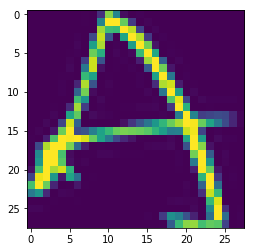

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(train_a_pickle[0])

### Problem 3

> Another check: we expect the data to be balanced across classes. Verify that.

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

<Container object of 10 artists>

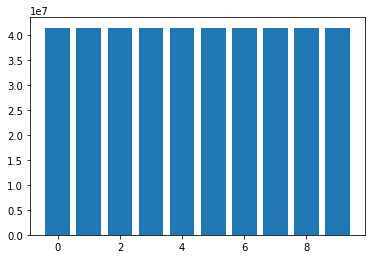

In [24]:
c = []
for t in tqdm_notebook(train_datasets):
  p = np.load(t)
  c.append(p.size)
    
plt.bar(range(len(c)), c)

> Merge and prune the training data as needed. Depending on your computer setup, you might not be able to fit it all in memory, and you can tune train_size as needed. The labels will be stored into a separate array of integers 0 through 9.

In [26]:
def make_arrays(nb_rows, img_size):
  if nb_rows:
    dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
    labels = np.ndarray(nb_rows, dtype=np.int32)
  else:
    dataset, labels = None, None
  return dataset, labels

def merge_datasets(pickle_files, train_size, valid_size=0):
  num_classes = len(pickle_files)
  valid_dataset, valid_labels = make_arrays(valid_size, image_size)
  train_dataset, train_labels = make_arrays(train_size, image_size)
  vsize_per_class = valid_size // num_classes
  tsize_per_class = train_size // num_classes
    
  start_v, start_t = 0, 0
  end_v, end_t = vsize_per_class, tsize_per_class
  end_l = vsize_per_class+tsize_per_class
  for label, pickle_file in enumerate(tqdm_notebook(pickle_files, desc="Merging")):
    try:
      with open(pickle_file, 'rb') as f:
        letter_set = pickle.load(f)
        # let's shuffle the letters to have random validation and training set
        np.random.shuffle(letter_set)
        if valid_dataset is not None:
          valid_letter = letter_set[:vsize_per_class, :, :]
          valid_dataset[start_v:end_v, :, :] = valid_letter
          valid_labels[start_v:end_v] = label
          start_v += vsize_per_class
          end_v += vsize_per_class
                    
        train_letter = letter_set[vsize_per_class:end_l, :, :]
        train_dataset[start_t:end_t, :, :] = train_letter
        train_labels[start_t:end_t] = label
        start_t += tsize_per_class
        end_t += tsize_per_class
    except Exception as e:
      print('Unable to process data from', pickle_file, ':', e)
      raise
    
  return valid_dataset, valid_labels, train_dataset, train_labels
            
            
train_size = 200000
valid_size = 10000
test_size = 10000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(
  train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

HBox(children=(IntProgress(value=0, description='Merging', max=10), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Merging', max=10), HTML(value='')))


Training: (200000, 28, 28) (200000,)
Validation: (10000, 28, 28) (10000,)
Testing: (10000, 28, 28) (10000,)


Total number of training data elements: 156800000
First element's label: 0
First element:


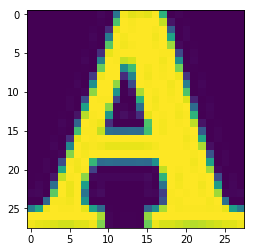

In [28]:
# Let's see what's inside...

print("Total number of training data elements: %d" % train_dataset.size)
print("First element's label: %d" % train_labels[0])
print("First element:")
plt.imshow(train_dataset[0])

In [29]:
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

### Problem 4
> Convince yourself that the data is still good after shuffling!

Let's print out the shapes again...

In [30]:
print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

Training: (200000, 28, 28) (200000,)
Validation: (10000, 28, 28) (10000,)
Testing: (10000, 28, 28) (10000,)


> Finally, let's save the data for later reuse

In [31]:
pickle_file = os.path.join(data_root, 'notMNIST.pickle')

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [32]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 690800506


### Problem 5
> Measure how much overlap there is between training, validation and test samples.

In [167]:
import numpy_indexed as npi
train_test_overlaps = npi.intersection(train_dataset, test_dataset) 
train_valid_overlaps = npi.intersection(train_dataset, valid_dataset) 
test_valid_overlaps = npi.intersection(test_dataset, valid_dataset) 

In [175]:
print("train: %d, test %d, overlaps %d" % (train_dataset.size, test_dataset.size, train_test_overlaps.size))
print("train: %d, valid %d, overlaps %d" % (train_dataset.size, valid_dataset.size, train_valid_overlaps.size))
print("test: %d, valid %d, overlaps %d" % (test_dataset.size, valid_dataset.size, test_valid_overlaps.size))

train: 156800000, test 7840000, overlaps 895328
train: 156800000, valid 7840000, overlaps 723632
test: 7840000, valid 7840000, overlaps 45472


### Problem 6

> Train a simple model on this data using 50, 100, 1000 and 5000 training samples. Hint: you can use the LogisticRegression model from sklearn.linear_model

This part is much harder than the previous since I have no experience with sklearn at all.

First, I started with [LogisticRegression documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). That didn't help much.

I later found the `LogisticRegression.fit(X, y)` function. `X` is the training data set. `y` is the training label.

However, `train_dataset` doesn't work as is.  After some search, I found a relevant [assignment discussions](https://discussions.udacity.com/t/assignment-1-problem-6-instructions-on-how-to-train-model/47556/2). In short, `train_dataset` is a 3D array and needed to be flattend to 2D. I.e., currently, it's composed of (sample index, x, y) where the value is the normalized color. The (x, y) portion can be flattend to a 1D, such that the length of the new array is basically width * height.

Finally, use Python's array slicing `my_array[start_index:end_index]` to limit the number of elements to pick from  `train_dataset`.

`LogisticRegression` is a classifier, and it seems that the convention is to name the variable `clf`.

In [36]:
def train(n):
    clf = LogisticRegression(verbose=True)
    (samples, width, height) = train_dataset.shape
    X = np.reshape(train_dataset,(samples,width*height))[0:n]
    y = train_labels[0:n]
    clf.fit(X, y)
    return clf

In [38]:
num_samples = 50

clf = train(num_samples)

[LibLinear]

After fitting (training) the model, use `predict` to make predictions using the `test_dataset`. The dataset also needs to be reshaped.

Finally, compare the prediction with `test_labels`. Rather than writing your own function to determine the accuracy score, use `sklearn.metrics.accuacy_score`. 

In [51]:
def test(clf):
    (tests, width, height) = test_dataset.shape
    X = np.reshape(test_dataset,(tests,width*height))
    return clf.predict(X)

In [54]:
from sklearn.metrics import accuracy_score

predictions = test(clf)

accuracy_score(test_labels, predictions)

0.62060000000000004

In [56]:
# Let's try training with 50, 100, 1000 and 5000 samples:

for n in [50, 100, 1000, 5000]:
    clf = train(n)
    predictions = test(clf)
    accuracy = accuracy_score(test_labels, predictions)
    print("%d samples, accuracy: %f" % (n, accuracy))

[LibLinear]50 samples, accuracy: 0.620600
[LibLinear]100 samples, accuracy: 0.713000
[LibLinear]1000 samples, accuracy: 0.838900
[LibLinear]5000 samples, accuracy: 0.852200


That was fun! My first ML model!

There are different solvers and tuning parameters. In the `LogisticRegression`, the regularization strength `C` is defaulted to `1.0`, and the solver is defaulted to `liblinear`. Let's try different parameters.

In [75]:
def train_optimized(n):
    clf = LogisticRegression(C=10.0 / n, multi_class='multinomial', max_iter=1000, solver='lbfgs', tol=0.1, verbose=True)
    (samples, width, height) = train_dataset.shape
    X = np.reshape(train_dataset,(samples,width*height))[0:n]
    y = train_labels[0:n]
    clf.fit(X, y)
    return clf

In [79]:
for n in [50, 100, 1000, 5000, 10000, 20000]:
    clf = train_optimized(n)
    predictions = test(clf)
    accuracy = accuracy_score(test_labels, predictions)
    print("%d samples, accuracy: %f" % (n, accuracy))

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


50 samples, accuracy: 0.621400
100 samples, accuracy: 0.705300


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


1000 samples, accuracy: 0.867800


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished


5000 samples, accuracy: 0.875800


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s finished


10000 samples, accuracy: 0.877000
20000 samples, accuracy: 0.878900


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s finished
